In [1]:
# mengimport library panda dan datasetnya

import pandas as pd

data = pd.read_csv('scrapped_data_spotify.csv')
data = data.head(20000)
data.tail()

,Time_submitted,Review,Rating,Total_thumbsup,Reply
19995,2023-08-22 11:26:00,I really liked this app until the new update. ...,1,21,NaN
19996,2018-09-25 00:33:30,Yet another android device I installed on that...,2,0,NaN
19997,2019-04-08 12:43:14,Best and largest music selection among other m...,5,0,NaN
19998,2023-02-28 15:50:04,"Music availability is great, but music playbac...",2,6,NaN
19999,2024-07-16 16:29:57,Apps good but it plays recommended songs on my...,2,0,NaN


In [2]:
# menghitung jumlah data yang kosong

data.isnull().sum()

Time_submitted        0
Review                0
Rating                0
Total_thumbsup        0
Reply             20000
dtype: int64

In [3]:
# menghapus kolom time_submitted dan reply

data.drop(['Time_submitted'], axis=1, inplace=True)
data.isnull().sum()

Review                0
Rating                0
Total_thumbsup        0
Reply             20000
dtype: int64

<AxesSubplot: xlabel='Rating', ylabel='count'>

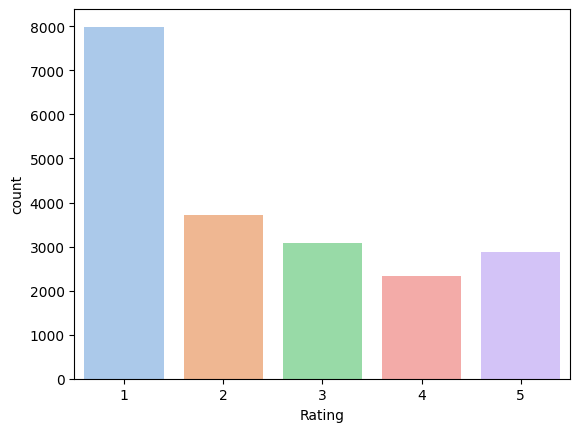

In [4]:
# mengimport library seaborn

import seaborn as sns
sns.countplot(x='Rating', data=data, palette='pastel')

In [5]:
# membuat kondisional untuk sentimentnya

def transform_ratings(rating):
    if rating == 5 or rating == 4:
        return "Good"
    if rating == 3:
        return "Natural"
    if rating == 2 or rating == 1:
        return "Bad"

,Review,Rating,Total_thumbsup,Reply,Desc,length
0,Spotify is the best app for listening to music...,4,7,NaN,Good,488
1,"-At random, the app will turn on smart shuffle...",2,22,NaN,Bad,491
2,"One of the worst monetization design ever, can...",1,87,NaN,Bad,447
3,This app is actually has good selection of mus...,2,5,NaN,Bad,481
4,I set my alarm to my playlist so i can listen ...,1,7,NaN,Bad,496


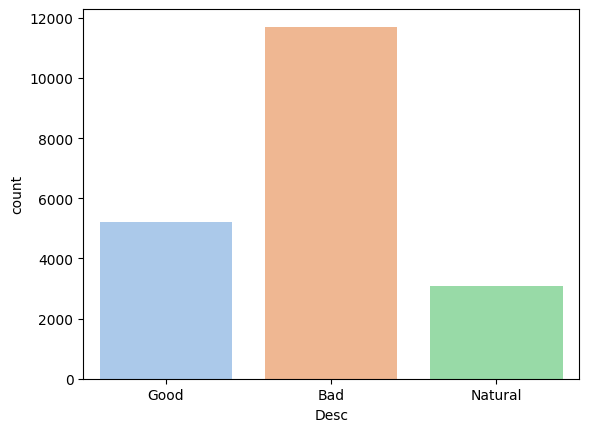

In [6]:
# membuat kolom baru bernama desc lalu membuat plot untuk mempresentasikan jumlah sentiment yang 
# good, bad, neutral. 

data['Desc'] = data['Rating'].apply(transform_ratings)
data['length'] = data['Review'].str.len()
sns.countplot(x='Desc', data=data, palette='pastel')
data.head()

<AxesSubplot: xlabel='length', ylabel='Total_thumbsup'>

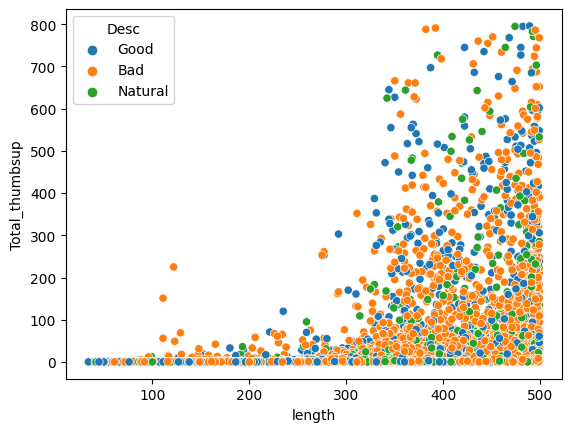

In [7]:
# membuat scatterplot untuk melihat pembagian panjang dan jumlah likenya

sns.scatterplot(x=data['length'][data.length < 500], 
y=data['Total_thumbsup'][data.Total_thumbsup < 800], 
hue=data['Desc'])

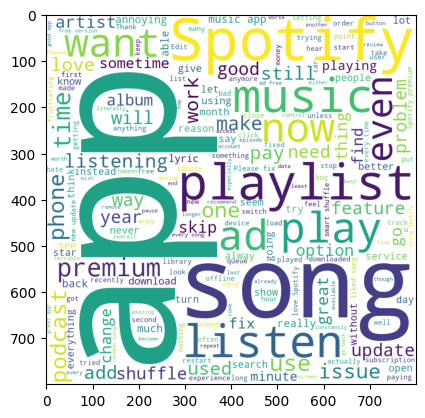

In [8]:
# mengimport library wordcloud

from wordcloud import WordCloud
import matplotlib.pyplot as plt

reviews = " ".join(data.loc[:,'Review'])
wordcloud = WordCloud(width=800,height=800,background_color='white',min_font_size=10).generate(reviews)
plt.imshow(wordcloud)

In [9]:
# mengimport library nltk dan melakukan text processing pada kolom review

import re
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

data.loc[:, 'Review'] = data.loc[:, 'Review'].apply(lambda x:" ".join(x.lower() for x in x.split()))
data.loc[:, 'Review'] = data.loc[:, 'Review'].apply(lambda word: re.sub('[^a-z A-Z 0-9-]+', '', word))

stop_words = stopwords.words('english')
data.loc[:, 'Review'] = data.loc[:, 'Review'].apply(lambda word: " ".join(word for word in word.split() if word not in stop_words))

stemmer = PorterStemmer()
data.loc[:, 'Review'] = data.loc[:, 'Review'].apply(lambda word: " ".join(stemmer.stem(word) for word in word.split()))

data.head()["Review"]

0    spotifi best app listen music podcast howev ap...
1    -at random app turn smart shuffl without warn ...
2    one worst monet design ever imagin music playe...
3    app actual good select music downsid random gl...
4    set alarm playlist listen song wake instead wa...
Name: Review, dtype: object

In [10]:
# menentukan parameter x dan y untuk proses training dan bagi data menjadi data training dan data testing.

from sklearn.model_selection import train_test_split
X = data['Review']
y = data['Desc']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=40)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((15000,), (5000,), (15000,), (5000,))

In [11]:
# menggunakan teknik label encoder untuk mengubah value dalam class desc menjadi numerical format

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(y_train)
y_train = le.transform(y_train)
y_test = le.transform(y_test)
y_train

array([1, 0, 2, ..., 2, 0, 2])

In [12]:
# melakukan vectorisasi dataframes menggunakan 2 teknik yaitu count dan TFIDF Vectorizer

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
cv = CountVectorizer()
cv.fit(X_train)
X_train_count = cv.transform(X_train)
X_test_count = cv.transform(X_test)
print(X_train_count)

  (0, 432)	1
  (0, 896)	2
  (0, 1000)	1
  (0, 1178)	1
  (0, 1341)	1
  (0, 1815)	1
  (0, 1955)	1
  (0, 2462)	2
  (0, 2874)	1
  (0, 4124)	1
  (0, 4271)	1
  (0, 4560)	2
  (0, 4854)	1
  (0, 5374)	1
  (0, 6231)	1
  (0, 6332)	1
  (0, 6846)	1
  (0, 7061)	2
  (0, 7222)	1
  (0, 7317)	1
  (0, 7503)	1
  (0, 8204)	1
  (0, 8318)	1
  (0, 8610)	2
  (0, 8676)	2
  :	:
  (14999, 5792)	1
  (14999, 6106)	1
  (14999, 6332)	2
  (14999, 6442)	1
  (14999, 6600)	1
  (14999, 6650)	1
  (14999, 6877)	1
  (14999, 6910)	2
  (14999, 7030)	1
  (14999, 7061)	3
  (14999, 7485)	1
  (14999, 7877)	1
  (14999, 8040)	1
  (14999, 8076)	1
  (14999, 8147)	1
  (14999, 8300)	1
  (14999, 8318)	1
  (14999, 8661)	1
  (14999, 9942)	2
  (14999, 10516)	1
  (14999, 10756)	1
  (14999, 11642)	1
  (14999, 11885)	1
  (14999, 11923)	1
  (14999, 12112)	1


In [13]:
# proses TFIDF Vectorizer yang akan digunakan untuk melatih model

tfidf = TfidfVectorizer(analyzer='char', ngram_range=(2,3))
tfidf.fit(X_train)
X_train_tfidf = tfidf.transform(X_train)
X_test_tfidf = tfidf.transform(X_test)
print(X_train_tfidf)

  (0, 10258)	0.043737522659766076
  (0, 10256)	0.04173626391158173
  (0, 10161)	0.07378241394917887
  (0, 10132)	0.03660557320749735
  (0, 10079)	0.03919213367868473
  (0, 10076)	0.02962416983118602
  (0, 10067)	0.047256361372219356
  (0, 9997)	0.06330003955023666
  (0, 9995)	0.06612201438138186
  (0, 9994)	0.05038953344292232
  (0, 9985)	0.10206031843412404
  (0, 9690)	0.029668323601425673
  (0, 9689)	0.02513661358069974
  (0, 9679)	0.04516118636569276
  (0, 9676)	0.05028211905772462
  (0, 9668)	0.06643831075332901
  (0, 9664)	0.08959150974245218
  (0, 9646)	0.03259611430620498
  (0, 9645)	0.052607275877128656
  (0, 9602)	0.0723185347600817
  (0, 9586)	0.024148636111773796
  (0, 9564)	0.02603633685748632
  (0, 9563)	0.024586221058185233
  (0, 9550)	0.034193980653899544
  (0, 9545)	0.027568167026500966
  :	:
  (14999, 449)	0.07467913308026951
  (14999, 431)	0.038935569749749446
  (14999, 414)	0.06928518717558024
  (14999, 412)	0.045901393624112836
  (14999, 407)	0.03908794166925475
  (

In [14]:
# mengimport random forest classifier dan melatih data trainnya

from sklearn.ensemble import RandomForestClassifier

rf1 = RandomForestClassifier()
rf1.fit(X_train_count, y_train)
rf_cv = rf1.score(X_test_count, y_test)
print(f'Random forest classifier on count vectors: {rf_cv}')

Random forest classifier on count vectors: 0.7084


In [15]:
# membandingkan hasilnya apabila menggunakan kombinasi random forest dengan TFIDF Vectorizer

rf2 = RandomForestClassifier()
rf2.fit(X_train_tfidf, y_train)
rf_tfidf = rf2.score(X_test_tfidf, y_test)
print(f'Random forest classifier on TF-IDF: {rf_tfidf}')

Random forest classifier on TF-IDF: 0.6748


In [16]:
# train dataframe menggunakan multinomial naive bayes yang dikombinasikan dengan count dan TDIDF Vectorization.

from sklearn.naive_bayes import MultinomialNB
mnb1 = MultinomialNB()
mnb1.fit(X_train_count, y_train)
mnb_cv = mnb1.score(X_test_count, y_test)
print(f'M Naive Bayes Classifier on CV: {mnb_cv}')

M Naive Bayes Classifier on CV: 0.7206


In [17]:
# membandingkan multinomial naive bayes dengan kombinasi TDIDF Vectorizer

mnb2 = MultinomialNB()
mnb2.fit(X_train_tfidf, y_train)
mnb_tfidf = mnb2.score(X_test_tfidf, y_test)
print(f'M Naive Bayes Classifier on TF-IDF: {mnb_tfidf}')

M Naive Bayes Classifier on TF-IDF: 0.6446


In [18]:
# membuat dataframe baru untuk membandingkan hasil accuracy score dari beberapa algoritma yang
# sudah dicoba sebelumnya

model = {'Model':['RF-Count', 'RF-TFIDF', 'MNB-Count', 'MNB-TFIDF'],
         'Score':[rf_cv, rf_tfidf, mnb_cv, mnb_tfidf]
         }
model_df = pd.DataFrame(model)
model_df

,Model,Score
0,RF-Count,0.7084
1,RF-TFIDF,0.6748
2,MNB-Count,0.7206
3,MNB-TFIDF,0.6446


<AxesSubplot: xlabel='Score', ylabel='Model'>

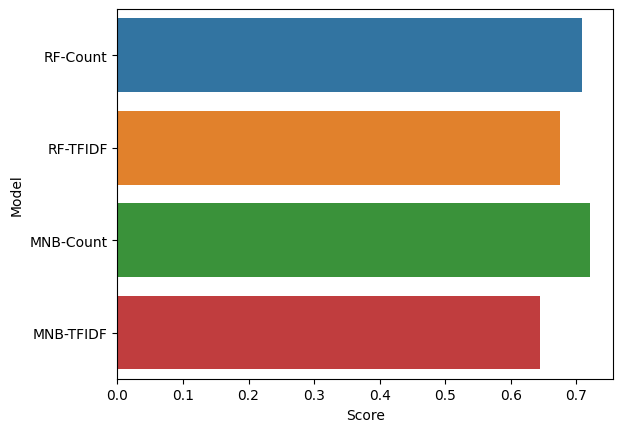

In [19]:
# membuat barplot untuk melihat visualisasi perbedaannya.

sns.barplot(data=model_df, y='Model',x='Score')

Text(0.5, 1.0, 'Confusion Matrix M NaiveBayes-Count')

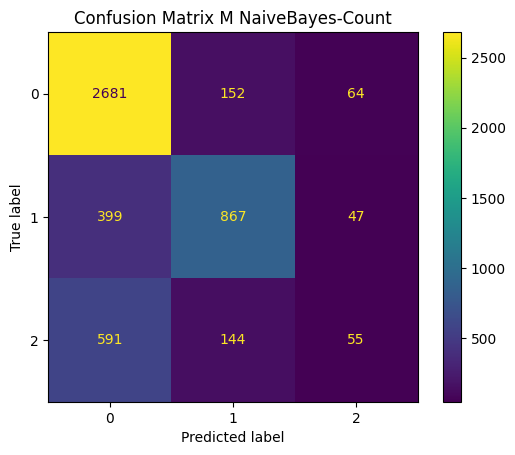

In [20]:
# perbandingan hasil prediksi klasifikasi model dengan hasil yang sesungguhnya menggunakan
# confusion matrix.

from sklearn.metrics import ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay.from_estimator(mnb1, X_test_count, y_test)
disp.ax_.set_title("Confusion Matrix M NaiveBayes-Count")

In [21]:
# menyimpan model dengan nilai accuracy paling tinggi menggunakan library pickle

import pickle

with open('model.pkl', 'wb') as f:
    pickle.dump(mnb1, f)
with open('transformer.pkl', 'wb') as f:
    pickle.dump(cv, f)
with open('le.pkl', 'wb') as f:
    pickle.dump(le, f)

In [22]:
# membuat list yang berisikan kalimat untuk dianalisis sentimentnya. Lalu kita prediksi menggunakan
# model yang sudah dibuat.

test_reviews = ['This is a great app!', 
                'No control options from my phones',
                'I like the song selection', 
                'bad ui',
                'i love this app']
pred = mnb1.predict(cv.transform(test_reviews))
pred_transformed = le.inverse_transform(pred).tolist()

In [23]:
# membuat dataframes baru yang berisi 2 kolom yaitu kalimat reviews dan hasil analisis sentimentnya

result = pd.DataFrame({'Reviews':test_reviews,
                       'Outcome':pred_transformed})
result

,Reviews,Outcome
0,This is a great app!,Good
1,No control options from my phones,Natural
2,I like the song selection,Good
3,bad ui,Bad
4,i love this app,Good


<AxesSubplot: xlabel='Outcome', ylabel='count'>

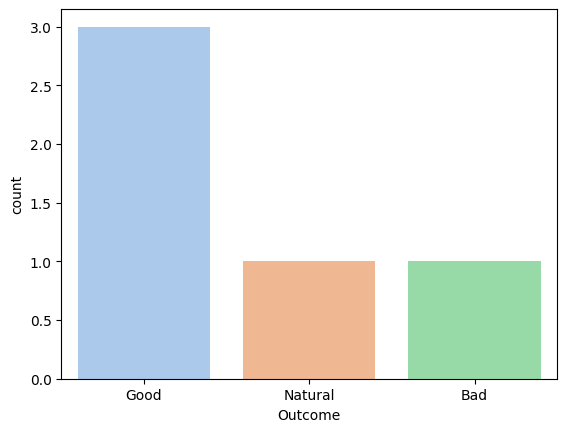

In [24]:
# membuat diagram batang untuk melihat berapa banyak total data dari masing-masing classes outcome

sns.countplot(x='Outcome', data=result, palette='pastel')